In [1]:
const ROOT = pwd()

using Distributed
nprocs() < 10 && addprocs(10) # uncomment to use multiple processes

@everywhere begin
    import Pkg
    Pkg.activate($ROOT)
end

@everywhere begin
    using QuantumCircuits
    using QuantumOptics
    using Statistics
    using Random
    using LinearAlgebra
end

  Activating  Activating  Activating  Activating  environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
  Activating  Activating  Activating  environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
 environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
   Activating environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`  Activating

 environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
 environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
  Activating environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`

┌ Info: Precompiling QuantumCircuits [01625e0c-f410-4aff-9d33-8c5e8b164a60]
└ @ Base loadi

In [2]:
using Plots

In [3]:
@everywhere begin
    # Basis
    q = SpinBasis(1//2)

    # Operators
    σx = sigmax(q)
    σy = sigmay(q)
    σz = sigmaz(q)
    id = identityoperator(q)

    # Initial condition
    ρ0 = dm(spinup(q))
    ρ1 = dm(spindown(q))
    σm = (σx + im*σy)/2
    u = (ρ0 + ρ1)/2
    
    # Helpers
    expects = ρ -> collect(real(expect(ρ, s)) for s in [σx,σy,σz])
    F(ρ,σ) = norm(tr(sqrt(sqrt(σ.data)*ρ.data*sqrt(σ.data))))^2
    average(ρt) = sum(ρt, dims=1)'/size(ρt)[1]
end

In [5]:
T = (0, 40*2e-7)
dt = 1e-9

κ = 2π*(1.56e6)
χ = 2π*(-0.47e6)
η = 0.17
γ1 = 1/(160e-6)
γϕ = 1/(16e-6)
ΩR = 0.3κ
θtilt = atan(2ΩR/κ)
ηz = cos(θtilt)^2
n̄ = 0.22
Γₘ = 8ηz*χ^2*n̄/κ / (1 + ηz*(2χ/κ)^2)
τₘ = 1/(η*Γₘ)
ẑeff = cos(θtilt)*σz - sin(θtilt)*σy

J = [sqrt((1-η)*Γₘ/2)*ẑeff, sqrt(γ1)σm, sqrt(γϕ/2)σz]
C = [ẑeff/√τₘ]
H0 = (ΩR/2) * (cos(θtilt)*σx + sin(θtilt)*σy)

# Random.seed!(1)
tt, ρt, dy = @time bayesian(T, ρ0, H0, J, C; dt=dt);

  4.619450 seconds (18.04 M allocations: 1.134 GiB, 4.64% gc time, 92.10% compilation time)


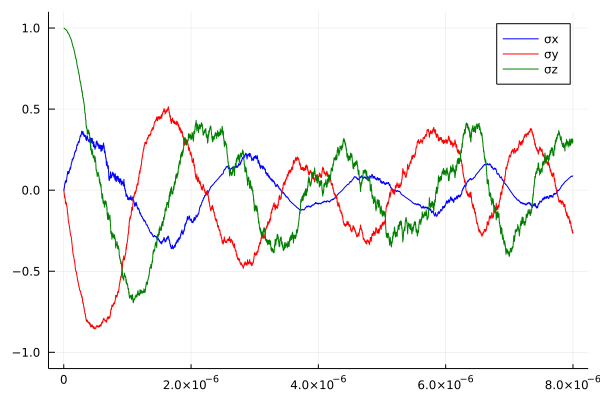

In [6]:
eρt = expects.(ρt)
plot(tt, map(x -> x[1], eρt), color="blue", label="σx")
plot!(tt, map(x -> x[2], eρt), color="red", label="σy")
plot!(tt, map(x -> x[3], eρt), color="green", label="σz")
ylims!(-1.1,1.1)

In [9]:
using HDF5

In [10]:
pwd()

"/Users/luke/Documents/work/Summer 2021/QuantumCircuits.jl"

In [44]:
Zfid = h5open("../Trajectories.jl/data/undriven/processed/13-12-47-4672-Z.pickle.h5")

🗂️ HDF5.File: (read-only) ../Trajectories.jl/data/undriven/processed/13-12-47-4672-Z.pickle.h5
├─ 📂 t_0
│  ├─ 🔢 N_reps
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_1
│  ├─ 🔢 I
│  ├─ 🔢 I_processed
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Q_processed
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_10
│  ├─ 🔢 I
│  ├─ 🔢 I_processed
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Q_processed
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_11
│  ├─ 🔢 I
│  ├─ 🔢 I_processed
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Q_processed
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_12
│  ├─ 🔢 I
│  ├─ 🔢 I_processed
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Q_processed
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_13
│ 

In [45]:
t40 = Zfid["t_40"]

📂 HDF5.Group: /t_40 (file: ../Trajectories.jl/data/undriven/processed/13-12-47-4672-Z.pickle.h5)
├─ 🔢 I
├─ 🔢 I_processed
├─ 🔢 N_reps
├─ 🔢 Q
├─ 🔢 Q_processed
├─ 🔢 Tm
├─ 🔢 dt
├─ 🔢 final_ro_results
├─ 🔢 integration_time
└─ 🔢 strong_ro_classifications

In [46]:
I = read(t40["I"])
Q = read(t40["Q"])
sro = read(t40["strong_ro_classifications"])

3767-element Vector{Int64}:
 1
 0
 1
 0
 1
 0
 0
 0
 1
 0
 1
 1
 0
 ⋮
 0
 1
 1
 0
 1
 0
 0
 0
 1
 0
 0
 1

In [47]:
Z = I + im*Q

8040×3767 Matrix{ComplexF64}:
 -244.488-95.0703im   11.5117-223.07im   …  -756.488-575.07im
 -3.97364+61.8352im   181.958+77.5011im     -29.9342+43.1257im
  240.077-294.577im   402.003-112.445im      148.979-567.79im
  2.55979-368.933im   208.777-170.453im     -375.461-554.007im
 -157.012-243.408im   118.187-249.859im     -579.398-166.53im
  -419.09-108.459im  -262.193-271.502im  …  -315.732+273.627im
 -608.263+280.706im  -401.866+151.122im     -17.2376+495.071im
 -519.009+321.016im   208.663+266.485im       279.68+275.235im
 -459.126+320.898im   80.7726-388.421im      338.191-13.4756im
 -320.086+316.499im  -559.502-146.145im      108.703-18.2786im
 -197.252+166.769im   -485.04+177.831im  …   498.854-52.128im
 -273.069+178.222im  -317.204+302.561im      559.663-613.29im
 -82.3461+419.468im  -157.414+310.965im     -162.939-883.784im
         ⋮                               ⋱  
 -147.188-250.276im  -65.1748+713.679im      25.0262+63.3192im
 -184.051+127.29im    57.9923+433.87im        59

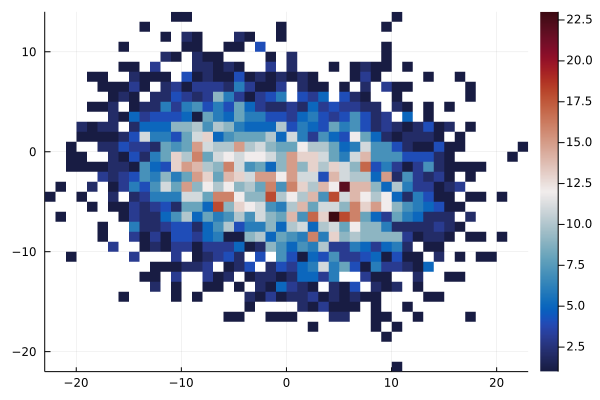

In [48]:
Z̄ = mean(Z; dims=1)'
histogram2d(real(Z̄), imag(Z̄); color=:balance, nbins=50)

In [49]:
inds₀ = findall(x -> x == 0, sro)
inds₁ = findall(x -> x == 1, sro)

1572-element Vector{Int64}:
    1
    3
    5
    9
   11
   12
   15
   18
   23
   24
   35
   36
   37
    ⋮
 3742
 3744
 3745
 3748
 3749
 3752
 3754
 3757
 3758
 3760
 3764
 3767

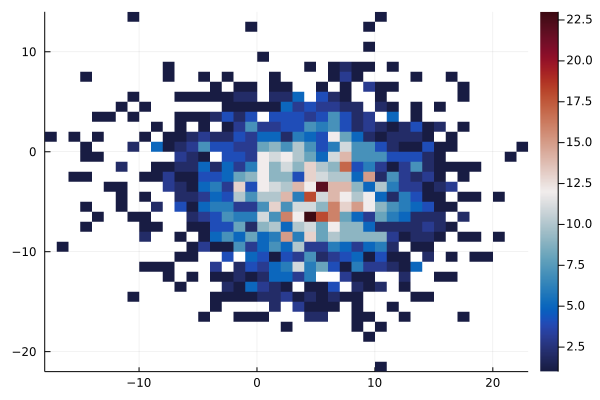

In [50]:
Z̄₀ = Z̄[inds₀]
histogram2d(real(Z̄₀), imag(Z̄₀); color=:balance, nbins=50)

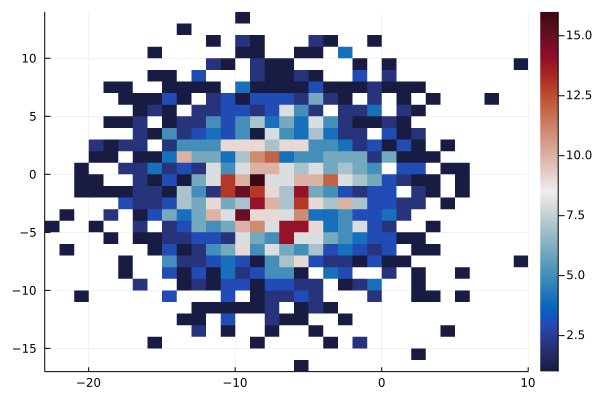

In [51]:
Z̄₁ = Z̄[inds₁]
histogram2d(real(Z̄₁), imag(Z̄₁); color=:balance, nbins=50)